<a href="https://colab.research.google.com/github/Infochem-code/skills-introduction-to-github/blob/main/Coursework_assignment_Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Running Problem 1 experiment: Dijkstra vs Bellman-Ford
Starting vertex: 82
Average Dijkstra time: 0.008078 seconds
Average Bellman-Ford time: 0.536087 seconds
Dijkstra is approximately 66.36x faster than Bellman-Ford


<ipython-input-1-bce0e192f139>:332: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([dijkstra_times, bellman_ford_times], labels=['Dijkstra', 'Bellman-Ford'])


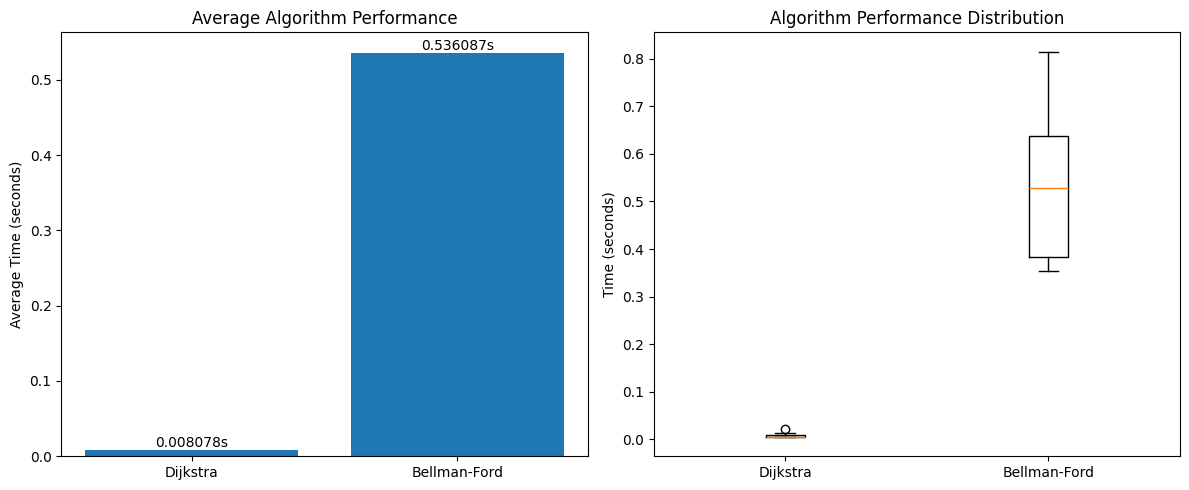


Running Problem 2 experiment: A* on grid with obstacles
A* Run 1/5...
  Start: (8, 17), Goal: (3, 11)
  Path found! Length: 12, Explored: 11 nodes
A* Run 2/5...
  Start: (4, 19), Goal: (8, 19)
  Path found! Length: 5, Explored: 4 nodes
A* Run 3/5...
  Start: (8, 4), Goal: (2, 1)
  Path found! Length: 10, Explored: 10 nodes
A* Run 4/5...
  Start: (2, 9), Goal: (5, 5)
  Path found! Length: 8, Explored: 9 nodes
A* Run 5/5...
  Start: (5, 14), Goal: (0, 6)
  Path found! Length: 20, Explored: 62 nodes
Paths found in 5 out of 5 runs
Average path length: 11.00
Average nodes explored: 19.20
Average execution time: 0.000101 seconds
Paths found in 5 out of 5 runs


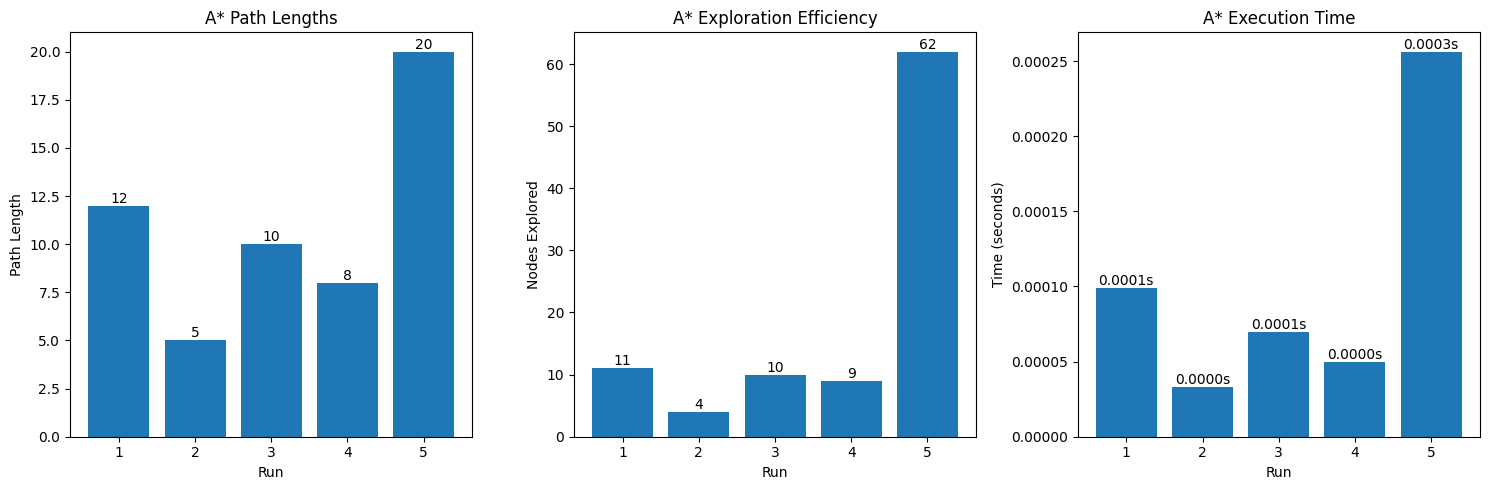

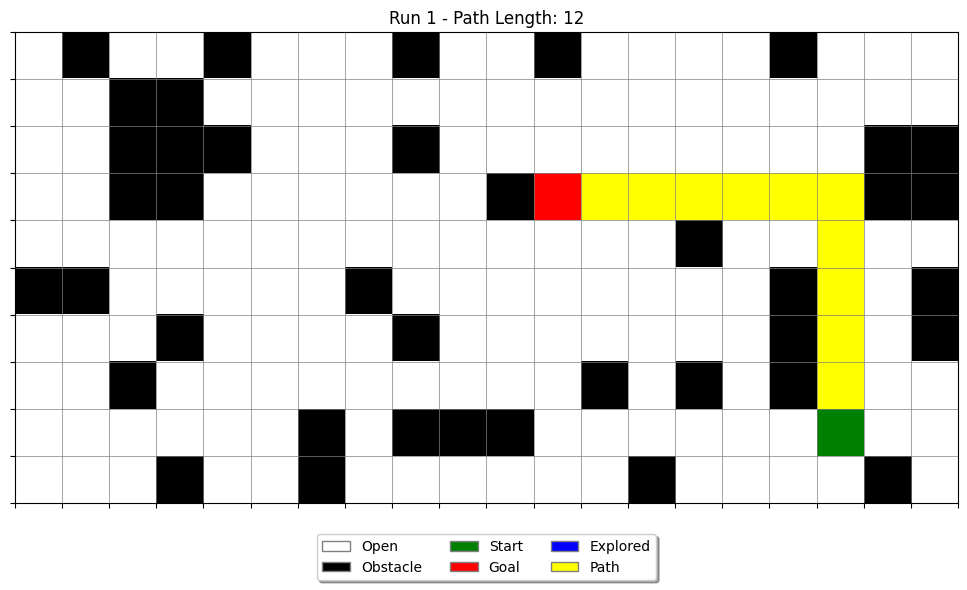

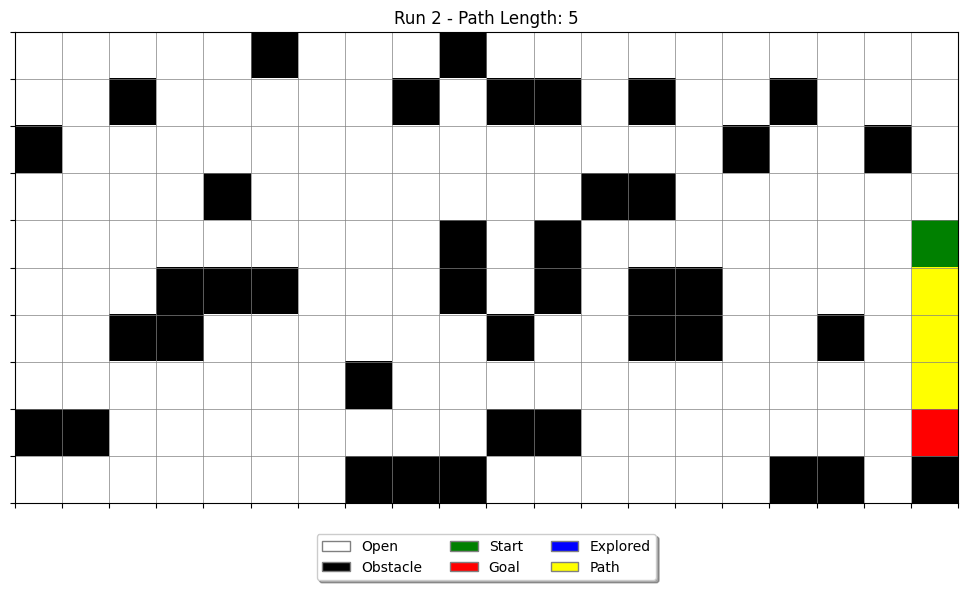

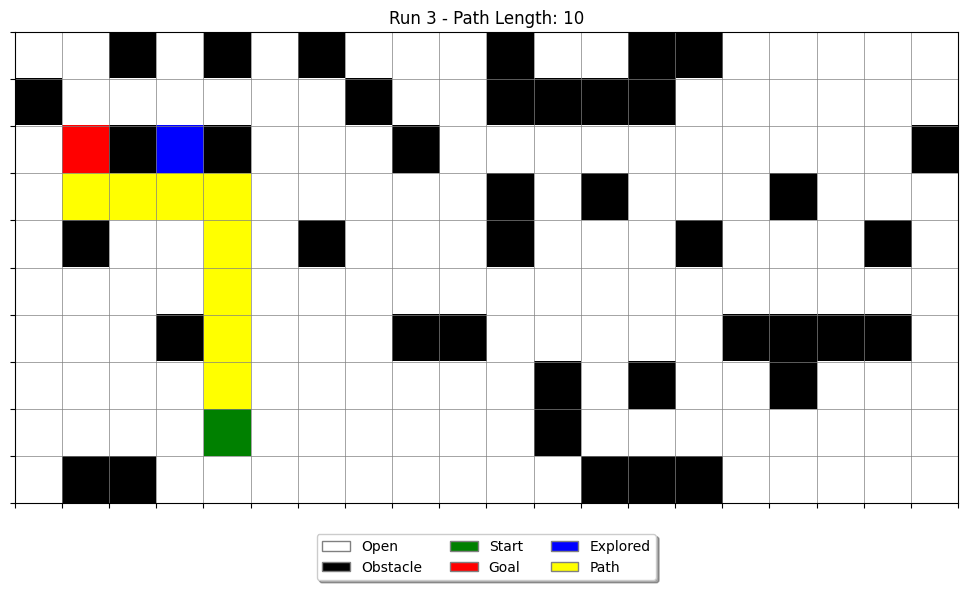

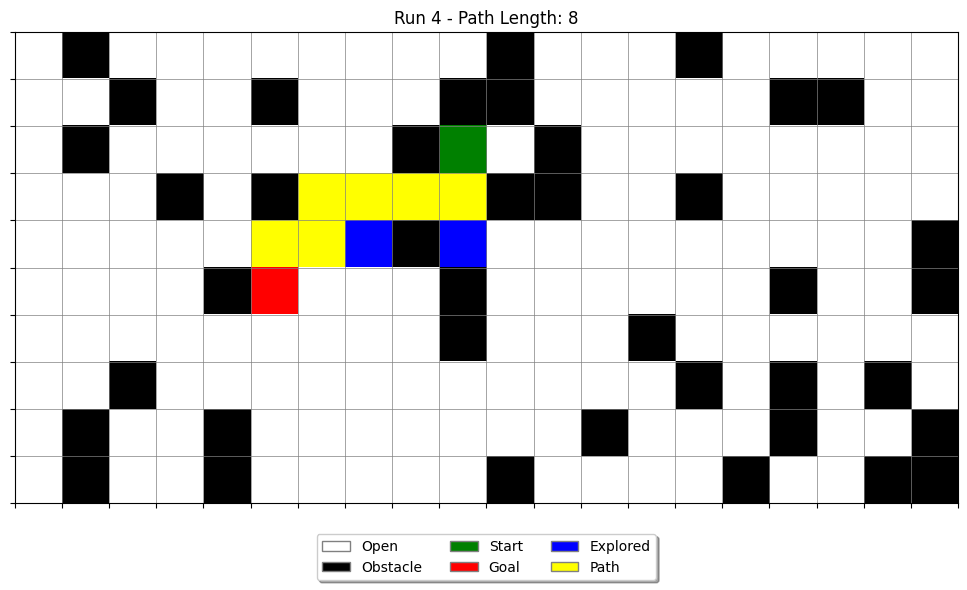

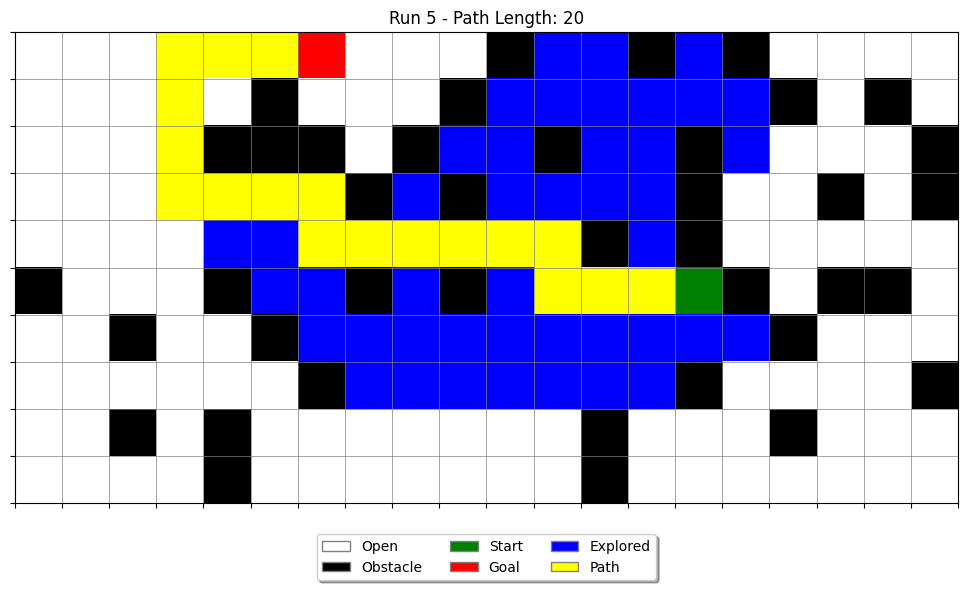


=== Analysis of Results ===
Problem 1: Dijkstra vs Bellman-Ford
- Dijkstra's algorithm time: 0.008078 seconds
- Bellman-Ford algorithm time: 0.536087 seconds
- Performance ratio: Bellman-Ford is 66.36x slower than Dijkstra
- This matches theoretical expectations: Dijkstra's is O((V+E)logV) while Bellman-Ford is O(V×E)
- For positive-weight graphs, Dijkstra's algorithm is more efficient

Problem 2: A* on Grid
- Success rate: 5/5 (100%)
- Average path length when found: 11.00
- Average nodes explored: 19.20
- Average execution time: 0.000101 seconds
- A* efficiently finds optimal paths by using a heuristic to guide the search


In [ ]:
# Path Search Algorithms Implementation in Google Colab
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import time
import heapq
from collections import defaultdict
import random

# Problem 1: Dijkstra and Bellman-Ford on random weighted graphs
def generate_random_graph(num_vertices, num_edges):
    """Generate a random undirected weighted graph represented as an adjacency matrix."""
    if num_edges > num_vertices * (num_vertices - 1) / 2:
        raise ValueError("Too many edges for the number of vertices in an undirected graph")

    # Initialize adjacency matrix with zeros
    adj_matrix = np.zeros((num_vertices, num_vertices), dtype=int)

    # Generate random edges
    edges_added = 0
    while edges_added < num_edges:
        # Choose random vertices
        i = random.randint(0, num_vertices - 1)
        j = random.randint(0, num_vertices - 1)

        # Skip self-loops and existing edges
        if i == j or adj_matrix[i][j] != 0:
            continue

        # Assign random weight (1-100)
        weight = random.randint(1, 100)

        # Set weight in both directions (undirected graph)
        adj_matrix[i][j] = weight
        adj_matrix[j][i] = weight

        edges_added += 1

    return adj_matrix

def dijkstra(graph, start):
    """
    Dijkstra's algorithm for finding shortest paths from a starting vertex.

    Args:
        graph: Adjacency matrix representation of the graph
        start: Starting vertex

    Returns:
        distances: Array of shortest distances from start to each vertex
        predecessors: Array of predecessors for path reconstruction
    """
    n = len(graph)
    distances = [float('inf')] * n
    distances[start] = 0
    predecessors = [-1] * n
    visited = [False] * n

    # Priority queue for vertices to visit
    priority_queue = [(0, start)]

    while priority_queue:
        current_distance, current_vertex = heapq.heappop(priority_queue)

        # Skip if we've already processed this vertex
        if visited[current_vertex]:
            continue

        visited[current_vertex] = True

        # Check all neighbors
        for neighbor in range(n):
            if graph[current_vertex][neighbor] > 0:  # If there's an edge
                weight = graph[current_vertex][neighbor]
                distance = current_distance + weight

                # If we found a shorter path
                if distance < distances[neighbor]:
                    distances[neighbor] = distance
                    predecessors[neighbor] = current_vertex
                    heapq.heappush(priority_queue, (distance, neighbor))

    return distances, predecessors

def bellman_ford(graph, start):
    """
    Bellman-Ford algorithm for finding shortest paths from a starting vertex.

    Args:
        graph: Adjacency matrix representation of the graph
        start: Starting vertex

    Returns:
        distances: Array of shortest distances from start to each vertex
        predecessors: Array of predecessors for path reconstruction
    """
    n = len(graph)
    distances = [float('inf')] * n
    distances[start] = 0
    predecessors = [-1] * n

    # Convert adjacency matrix to edge list for easier processing
    edges = []
    for i in range(n):
        for j in range(n):
            if graph[i][j] > 0:
                edges.append((i, j, graph[i][j]))

    # Relax edges n-1 times
    for _ in range(n - 1):
        for u, v, weight in edges:
            if distances[u] != float('inf') and distances[u] + weight < distances[v]:
                distances[v] = distances[u] + weight
                predecessors[v] = u

    # Check for negative weight cycles (shouldn't happen with positive weights)
    for u, v, weight in edges:
        if distances[u] != float('inf') and distances[u] + weight < distances[v]:
            raise ValueError("Graph contains a negative weight cycle")

    return distances, predecessors

def run_algorithm_experiment(num_vertices=100, num_edges=500, num_runs=10):
    """Run the experiment comparing Dijkstra and Bellman-Ford algorithms."""
    # Generate a random graph
    graph = generate_random_graph(num_vertices, num_edges)

    # Choose a random starting vertex
    start_vertex = random.randint(0, num_vertices - 1)
    print(f"Starting vertex: {start_vertex}")

    dijkstra_times = []
    bellman_ford_times = []

    for run in range(num_runs):
        print(f"Run {run+1}/{num_runs}...", end="\r")

        # Run Dijkstra's algorithm and measure time
        start_time = time.time()
        dijkstra_distances, _ = dijkstra(graph, start_vertex)
        end_time = time.time()
        dijkstra_times.append(end_time - start_time)

        # Run Bellman-Ford algorithm and measure time
        start_time = time.time()
        bellman_ford_distances, _ = bellman_ford(graph, start_vertex)
        end_time = time.time()
        bellman_ford_times.append(end_time - start_time)

        # Verify that both algorithms give the same distances
        if not np.allclose(dijkstra_distances, bellman_ford_distances, rtol=1e-5, atol=1e-5):
            print("Warning: Algorithms produced different results")

    avg_dijkstra_time = sum(dijkstra_times) / num_runs
    avg_bellman_ford_time = sum(bellman_ford_times) / num_runs

    return {
        'dijkstra_times': dijkstra_times,
        'bellman_ford_times': bellman_ford_times,
        'avg_dijkstra_time': avg_dijkstra_time,
        'avg_bellman_ford_time': avg_bellman_ford_time
    }

# Problem 2: A* algorithm on a grid with obstacles
def generate_grid(rows=10, cols=20, num_obstacles=40):
    """Generate a grid with randomly placed obstacles."""
    # Create an empty grid (0: open, 1: obstacle)
    grid = np.zeros((rows, cols), dtype=int)

    # Place obstacles randomly
    obstacles_placed = 0
    while obstacles_placed < num_obstacles:
        row = random.randint(0, rows - 1)
        col = random.randint(0, cols - 1)

        if grid[row][col] == 0:  # If not already an obstacle
            grid[row][col] = 1
            obstacles_placed += 1

    return grid

def heuristic(a, b):
    """Manhattan distance heuristic for A* algorithm."""
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def get_neighbors(grid, node):
    """Get valid neighbors of a node in the grid."""
    rows, cols = grid.shape
    row, col = node
    neighbors = []

    # Check all four adjacent cells
    for dr, dc in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
        r, c = row + dr, col + dc
        if 0 <= r < rows and 0 <= c < cols and grid[r][c] == 0:
            neighbors.append((r, c))

    return neighbors

def a_star(grid, start, goal):
    """
    A* search algorithm to find the shortest path in a grid.

    Args:
        grid: 2D array representing the grid (0: open, 1: obstacle)
        start: Tuple (row, col) representing the start position
        goal: Tuple (row, col) representing the goal position

    Returns:
        path: List of positions forming the shortest path, or None if no path exists
        explored: Set of positions that were explored during the search
    """
    # Check if start or goal is an obstacle
    if grid[start[0]][start[1]] == 1 or grid[goal[0]][goal[1]] == 1:
        return None, set()

    open_set = []  # Priority queue
    closed_set = set()  # Set of explored nodes

    # For each node, we store (f_score, position, g_score, parent)
    heapq.heappush(open_set, (heuristic(start, goal), start, 0, None))

    # Maps a node to its parent
    came_from = {}

    # g_score[n] is the cost of the cheapest path from start to n
    g_score = {start: 0}

    while open_set:
        # Get the node with the lowest f_score
        _, current, current_g_score, parent = heapq.heappop(open_set)

        if current in closed_set:
            continue

        # Store the parent for reconstructing the path
        if parent is not None:
            came_from[current] = parent

        # If we reached the goal
        if current == goal:
            # Reconstruct path
            path = [current]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            return path[::-1], closed_set  # Reverse the path

        closed_set.add(current)

        # Check all neighbors
        for neighbor in get_neighbors(grid, current):
            if neighbor in closed_set:
                continue

            # Cost to reach neighbor is 1 (all moves cost 1)
            tentative_g_score = current_g_score + 1

            # If we haven't seen this neighbor or found a better path
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                g_score[neighbor] = tentative_g_score
                f_score = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(open_set, (f_score, neighbor, tentative_g_score, current))

    # No path found
    return None, closed_set

def run_a_star_experiment(rows=10, cols=20, num_obstacles=40, num_runs=5):
    """Run the A* algorithm experiment."""
    results = []

    for run in range(num_runs):
        print(f"A* Run {run+1}/{num_runs}...")

        # Generate a new grid with obstacles
        grid = generate_grid(rows, cols, num_obstacles)

        # Find two random non-obstacle cells
        open_cells = [(r, c) for r in range(rows) for c in range(cols) if grid[r][c] == 0]
        start, goal = random.sample(open_cells, 2)
        print(f"  Start: {start}, Goal: {goal}")

        # Run A* and measure time
        start_time = time.time()
        path, explored = a_star(grid, start, goal)
        end_time = time.time()

        if path:
            print(f"  Path found! Length: {len(path)}, Explored: {len(explored)} nodes")
        else:
            print(f"  No path found. Explored: {len(explored)} nodes")

        results.append({
            'run': run + 1,
            'grid': grid.copy(),
            'start': start,
            'goal': goal,
            'path': path,
            'explored': explored,
            'path_length': len(path) if path else None,
            'explored_count': len(explored),
            'time': end_time - start_time,
            'path_exists': path is not None
        })

    return results

# Visualization functions
def visualize_graph_results(results):
    """Visualize the results of the graph algorithm experiment."""
    dijkstra_times = results['dijkstra_times']
    bellman_ford_times = results['bellman_ford_times']

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    bars = plt.bar(['Dijkstra', 'Bellman-Ford'],
            [results['avg_dijkstra_time'], results['avg_bellman_ford_time']])
    plt.ylabel('Average Time (seconds)')
    plt.title('Average Algorithm Performance')

    # Add time values on top of the bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.6f}s',
                ha='center', va='bottom', rotation=0)

    plt.subplot(1, 2, 2)
    plt.boxplot([dijkstra_times, bellman_ford_times], labels=['Dijkstra', 'Bellman-Ford'])
    plt.ylabel('Time (seconds)')
    plt.title('Algorithm Performance Distribution')

    plt.tight_layout()
    plt.savefig('graph_results.png')  # Save figure for Colab
    plt.show()

def visualize_grid(grid, start=None, goal=None, path=None, explored=None, title=None):
    """Visualize a grid with optional path and explored nodes."""
    rows, cols = grid.shape

    # Create a colormap for the grid
    cmap = plt.cm.colors.ListedColormap(['white', 'black', 'green', 'red', 'blue', 'yellow'])
    bounds = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
    norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)

    # Copy grid to avoid modifying original
    vis_grid = grid.copy()

    # Mark explored nodes
    if explored:
        for node in explored:
            if node != start and node != goal:
                vis_grid[node[0], node[1]] = 4  # Blue

    # Mark path
    if path:
        for node in path:
            if node != start and node != goal:
                vis_grid[node[0], node[1]] = 5  # Yellow

    # Mark start and goal
    if start:
        vis_grid[start[0], start[1]] = 2  # Green
    if goal:
        vis_grid[goal[0], goal[1]] = 3  # Red

    plt.figure(figsize=(12, 6))
    plt.imshow(vis_grid, cmap=cmap, norm=norm)
    plt.grid(which='major', axis='both', linestyle='-', color='gray', linewidth=0.5)
    plt.xticks(np.arange(-0.5, cols, 1), [])
    plt.yticks(np.arange(-0.5, rows, 1), [])

    if title:
        plt.title(title)
    else:
        plt.title('Grid Map with Path')

    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='white', edgecolor='gray', label='Open'),
        Patch(facecolor='black', edgecolor='gray', label='Obstacle'),
        Patch(facecolor='green', edgecolor='gray', label='Start'),
        Patch(facecolor='red', edgecolor='gray', label='Goal'),
        Patch(facecolor='blue', edgecolor='gray', label='Explored'),
        Patch(facecolor='yellow', edgecolor='gray', label='Path')
    ]
    plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.05),
               fancybox=True, shadow=True, ncol=3)

    plt.tight_layout()
    plt.savefig(f'grid_visualization{"_" + title if title else ""}.png')  # Save figure for Colab
    plt.show()

def visualize_a_star_results(results):
    """Visualize the results of the A* algorithm experiment."""
    path_lengths = [r['path_length'] for r in results if r['path_exists']]
    explored_counts = [r['explored_count'] for r in results]
    times = [r['time'] for r in results]

    successful_runs = sum(1 for r in results if r['path_exists'])
    print(f"Paths found in {successful_runs} out of {len(results)} runs")

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    if path_lengths:
        bars = plt.bar(range(1, len(path_lengths) + 1), path_lengths)
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height, str(int(height)),
                    ha='center', va='bottom')
    else:
        plt.text(0.5, 0.5, "No paths found", ha='center', va='center')
    plt.xlabel('Run')
    plt.ylabel('Path Length')
    plt.title('A* Path Lengths')

    plt.subplot(1, 3, 2)
    bars = plt.bar(range(1, len(explored_counts) + 1), explored_counts)
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height, str(int(height)),
                ha='center', va='bottom')
    plt.xlabel('Run')
    plt.ylabel('Nodes Explored')
    plt.title('A* Exploration Efficiency')

    plt.subplot(1, 3, 3)
    bars = plt.bar(range(1, len(times) + 1), times)
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.4f}s',
                ha='center', va='bottom')
    plt.xlabel('Run')
    plt.ylabel('Time (seconds)')
    plt.title('A* Execution Time')

    plt.tight_layout()
    plt.savefig('a_star_results.png')  # Save figure for Colab
    plt.show()

    # Visualize all grid examples
    for i, result in enumerate(results):
        title = f"Run {i+1}"
        if result['path_exists']:
            title += f" - Path Length: {result['path_length']}"
        else:
            title += " - No path found"

        visualize_grid(result['grid'], result['start'], result['goal'],
                      result['path'], result['explored'], title)

# Run experiments
def run_all_experiments():
    # Set random seed for reproducibility
    random.seed(42)
    np.random.seed(42)

    # Run Problem 1: Dijkstra vs Bellman-Ford
    print("Running Problem 1 experiment: Dijkstra vs Bellman-Ford")
    graph_results = run_algorithm_experiment()
    print(f"Average Dijkstra time: {graph_results['avg_dijkstra_time']:.6f} seconds")
    print(f"Average Bellman-Ford time: {graph_results['avg_bellman_ford_time']:.6f} seconds")
    print(f"Dijkstra is approximately {graph_results['avg_bellman_ford_time']/graph_results['avg_dijkstra_time']:.2f}x faster than Bellman-Ford")
    visualize_graph_results(graph_results)

    # Run Problem 2: A* on grid
    print("\nRunning Problem 2 experiment: A* on grid with obstacles")
    a_star_results = run_a_star_experiment()

    successful_runs = sum(1 for r in a_star_results if r['path_exists'])
    print(f"Paths found in {successful_runs} out of {len(a_star_results)} runs")

    if successful_runs > 0:
        avg_path_length = sum(r['path_length'] for r in a_star_results if r['path_exists']) / successful_runs
        print(f"Average path length: {avg_path_length:.2f}")

    avg_explored = sum(r['explored_count'] for r in a_star_results) / len(a_star_results)
    print(f"Average nodes explored: {avg_explored:.2f}")

    avg_time = sum(r['time'] for r in a_star_results) / len(a_star_results)
    print(f"Average execution time: {avg_time:.6f} seconds")

    visualize_a_star_results(a_star_results)

    # Print summary and analysis
    print("\n=== Analysis of Results ===")
    print("Problem 1: Dijkstra vs Bellman-Ford")
    print(f"- Dijkstra's algorithm time: {graph_results['avg_dijkstra_time']:.6f} seconds")
    print(f"- Bellman-Ford algorithm time: {graph_results['avg_bellman_ford_time']:.6f} seconds")
    print(f"- Performance ratio: Bellman-Ford is {graph_results['avg_bellman_ford_time']/graph_results['avg_dijkstra_time']:.2f}x slower than Dijkstra")
    print("- This matches theoretical expectations: Dijkstra's is O((V+E)logV) while Bellman-Ford is O(V×E)")
    print("- For positive-weight graphs, Dijkstra's algorithm is more efficient")

    print("\nProblem 2: A* on Grid")
    print(f"- Success rate: {successful_runs}/{len(a_star_results)} ({successful_runs/len(a_star_results)*100:.0f}%)")
    if successful_runs > 0:
        print(f"- Average path length when found: {avg_path_length:.2f}")
    print(f"- Average nodes explored: {avg_explored:.2f}")
    print(f"- Average execution time: {avg_time:.6f} seconds")
    print("- A* efficiently finds optimal paths by using a heuristic to guide the search")

# Run all experiments when executed
run_all_experiments()